# K MEAN DIGIT CLASSIFICATION

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Load the MNIST dataset from mnist.npz file
with np.load('../data/mnist.npz') as f:
    x_train, y_train = f['x_train'], f['y_train']
    x_test, y_test = f['x_test'], f['y_test']

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [5]:
x_train[0], y_train[0]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
           0

## Plot digits

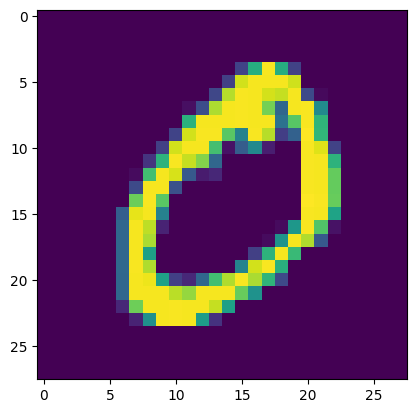

In [16]:
plt.imshow(x_train[1])

## Preprocess Data

In [17]:
# flatten from 28x28 --> 784x1
x_train = x_train.reshape(len(x_train),-1)
x_test = x_test.reshape(len(x_test),-1)
print(x_train.shape)

(60000, 784)


# K-Means

## Random Initialization

We can try different distance measures like L1, L2,L∞

Also do a plot to find best value of K and see if it is actually the most digit-like centroid

In [18]:
# kmeans
def l2_dist(x1,x2):
    distance = np.sqrt(np.sum((np.array(x1) - np.array(x2))**2))
    return distance

In [19]:
K = 10 # for 10 digits

cluster_assignments = np.array([-1]*len(x_train))

# init centroids randomly
centroids = x_train[np.random.choice(x_train.shape[0], K, replace=False)]
# centroids = np.array([np.random.randint(0, 256, (1, 784)) for _ in range(K)])

centroids.shape # (10, 784)

(10, 784)

1 inf
2 329257.68367115455
3 256869.24644803675
4 165873.11393079627
5 60425.3151664217
6 14141.987995654345
7 8715.88721172139
8 7549.67568014469
9 5757.110181593336
10 5455.399752217345


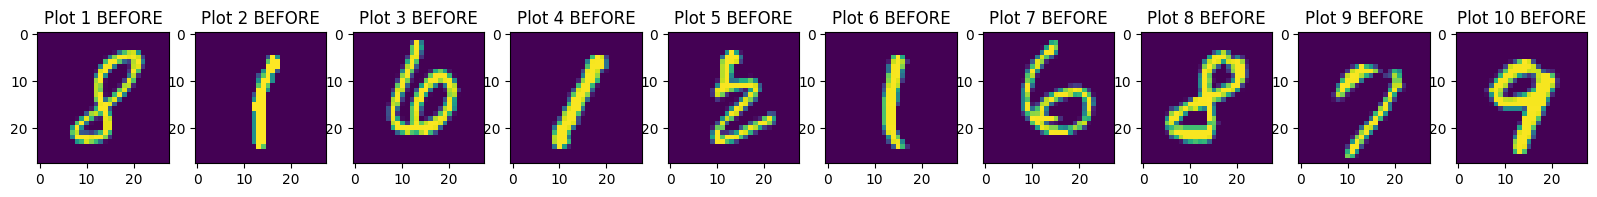

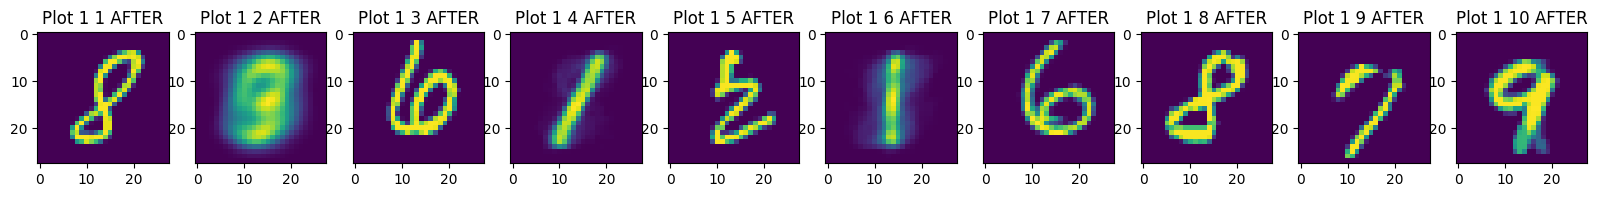

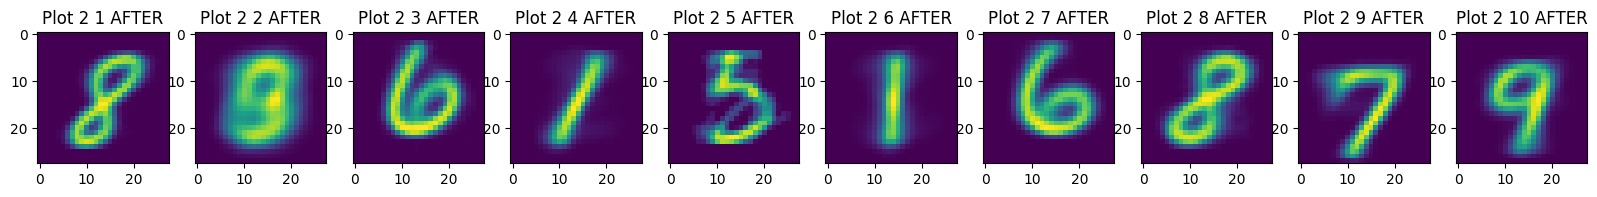

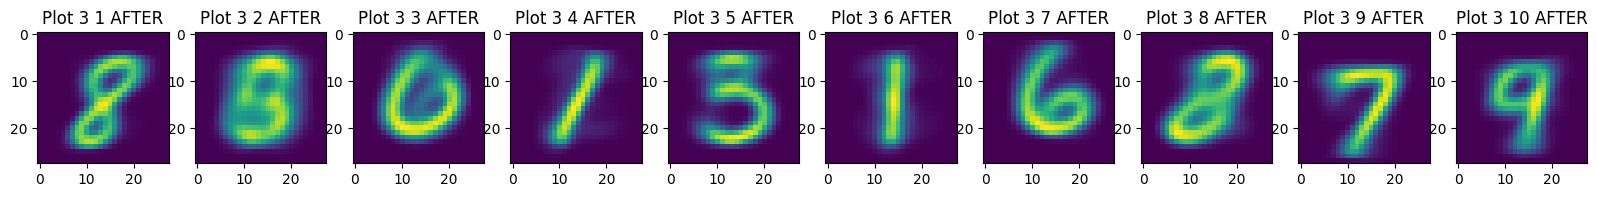

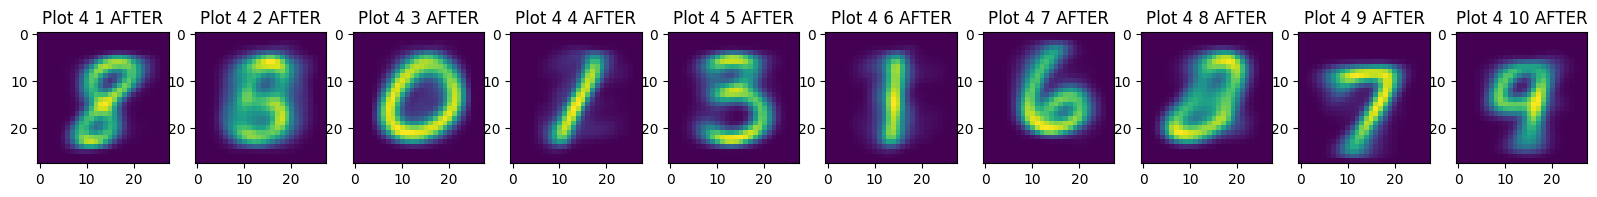

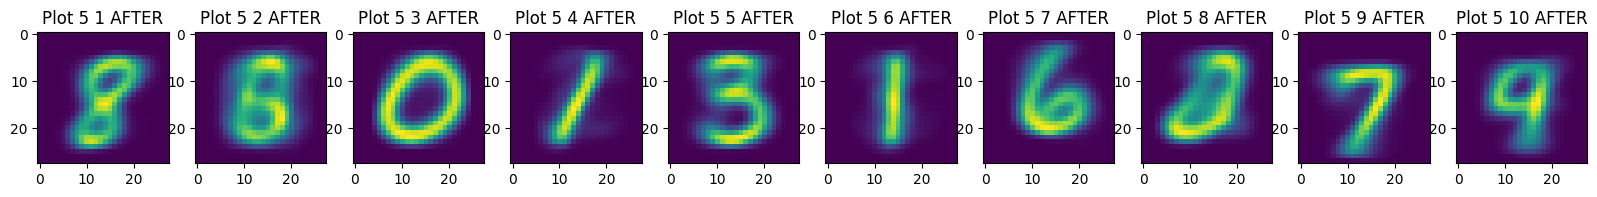

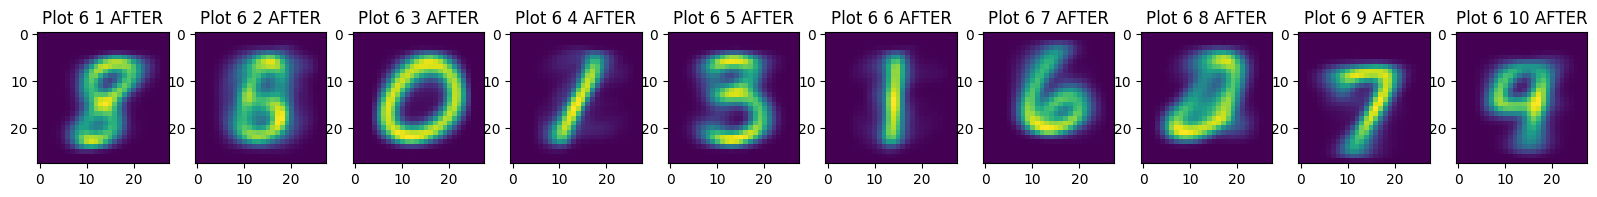

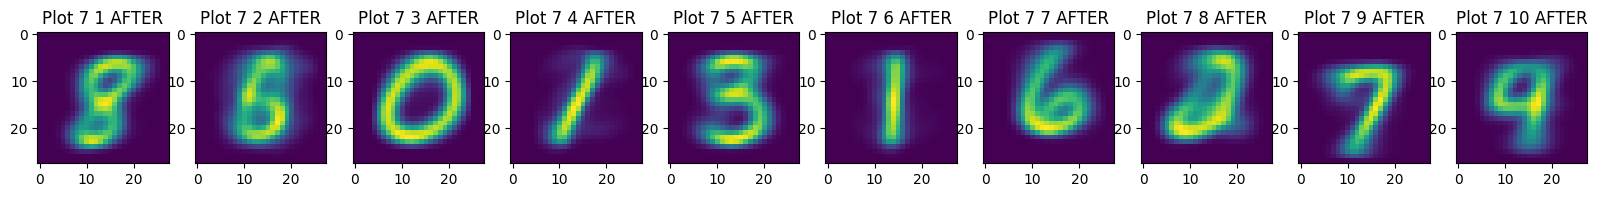

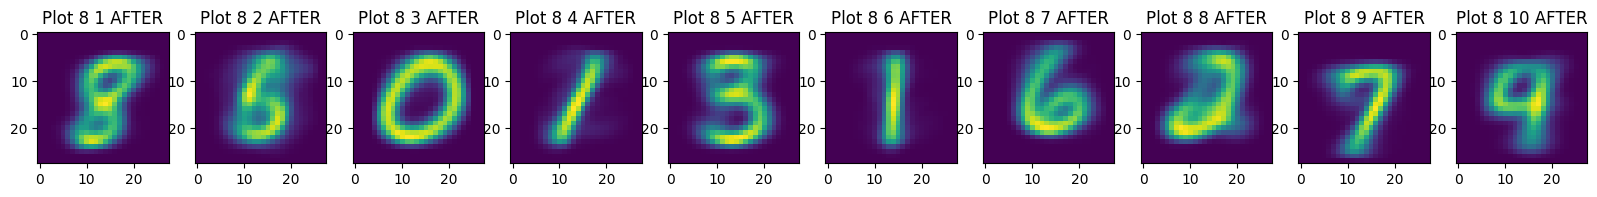

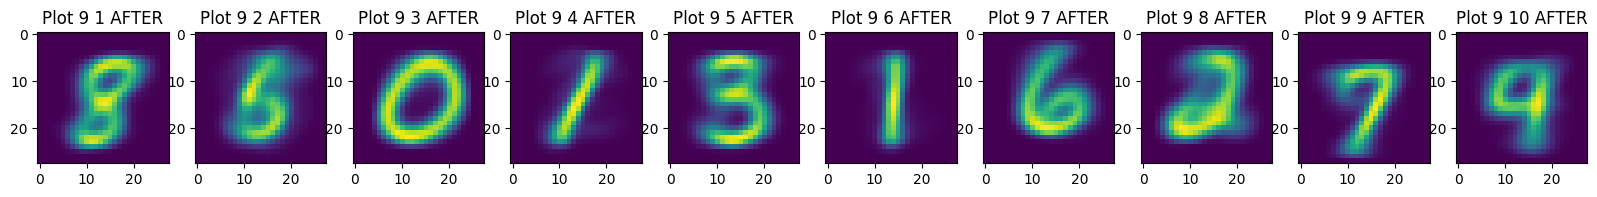

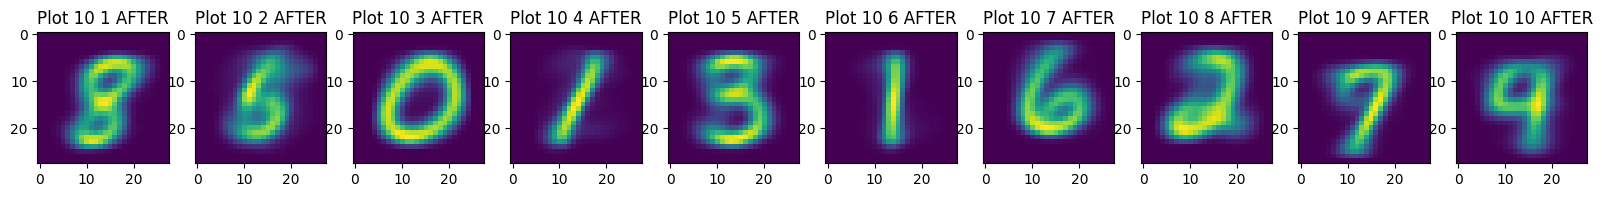

In [20]:
tol=0.05 # experiment with this

prev_error = float("inf")
curr_error = float("inf")

N = len(x_train)
counter = 0

fig, axs = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
  axs[i].imshow(centroids[i].reshape((28,28)))  # Replace with your data
  axs[i].set_title(f'Plot {i+1} BEFORE')  # Set a title for each plot

for i in range(10):
  counter +=1
  # print("COUNTER:", counter)
  for i in range(N):
    # Calculate the distance from the data point to each centroid
    dists = [l2_dist(x_train[i], centroid) for centroid in centroids]
    # Assign the data point to the cluster with the nearest centroid
    assignment = dists.index(min(dists))
    cluster_assignments[i] = assignment

  # update centroids
  for centroid_num in range(K):
    new_centroids = np.array([x_train[cluster_assignments == i].mean(axis=0) for i in range(K)])

    # Check for convergence
    # if np.all(centroids == new_centroids): break
    centroids = new_centroids

  # meanerror
  meanerror = 0
  for i in range(N):
    meanerror += l2_dist(x_train[i], centroids[cluster_assignments[i]])**2
  meanerror = meanerror / len(x_train)
  curr_error = meanerror

  if abs(curr_error - prev_error) <= tol: break
  print(counter, abs(curr_error - prev_error))
  prev_error = curr_error

  # print("PLOT", centroids[0])
  # plt.imshow(centroids[0].reshape((28,28)))

  fig, axs = plt.subplots(1, 10, figsize=(20, 2))
  for i in range(10):
    axs[i].imshow(centroids[i].reshape((28,28)))  # Replace with your data
    axs[i].set_title(f'Plot {counter} {i+1} AFTER')  # Set a title for each plot

# Show the plot
plt.show()

In [21]:
centroids.shape

(10, 784)

## Hierarchical Plan
Do hierarchical clustering to get to k clusters from a (small) subset of the data, then randomly select one point from each cluster


In [22]:
K_2 = 10
cluster_assignments_2 = np.array([-1] * len(x_train))

# find small subset of data to init clusters
indices_2 = np.random.choice(x_train.shape[0], size=2*K_2, replace=False)
subset_2 = x_train[indices_2]

# track indices
original_indices_2 = [[index] for index in indices_2]

# calculate pair distance
distances_2 = np.array([[np.linalg.norm(subset_2[i] - subset_2[j]) for j in range(subset_2.shape[0])] for i in range(subset_2.shape[0])])

while len(subset_2) > K_2:
    min_dist_2 = np.inf
    pair_to_merge_2 = (0, 1)

    # find closest pair
    for i in range(len(subset_2)):
        for j in range(i + 1, len(subset_2)):
            if distances_2[i, j] < min_dist_2:
                min_dist_2 = distances_2[i, j]
                pair_to_merge_2 = (i, j)

    # merge closest pair
    new_point_2 = (subset_2[pair_to_merge_2[0]] + subset_2[pair_to_merge_2[1]]) / 2

    # update subset
    new_indices_2 = list(set(range(len(subset_2))) - set(pair_to_merge_2))
    subset_2 = np.vstack([subset_2[new_indices_2], new_point_2])

    # update original indices tracking
    merged_indices = original_indices_2[pair_to_merge_2[0]] + original_indices_2[pair_to_merge_2[1]]
    original_indices_2 = [original_indices_2[idx] for idx in new_indices_2] + [merged_indices]

    # recalculate distance matrix
    new_distances_2 = np.zeros((len(subset_2), len(subset_2)))
    for i in range(len(subset_2)):
        for j in range(i + 1, len(subset_2)):
            new_distances_2[i, j] = new_distances_2[j, i] = np.linalg.norm(subset_2[i] - subset_2[j])
        new_distances_2[i, i] = np.inf # makes sure not the same point
    distances_2 = new_distances_2

# calculate centroids
centroids_2 = np.zeros((K_2, x_train.shape[1]))
for i in range(K_2):
    points_indices = np.hstack(original_indices_2[i])
    centroids_2[i] = np.mean(x_train[points_indices], axis=0)

centroids_2.shape


(10, 784)

1 inf
2 222025.29584538937
3 105836.88257623883
4 48535.451326930895
5 22163.086199673824
6 9612.273909536656
7 4451.093835817184
8 2716.4156193826348
9 2346.641579303425
10 2372.4131270609796


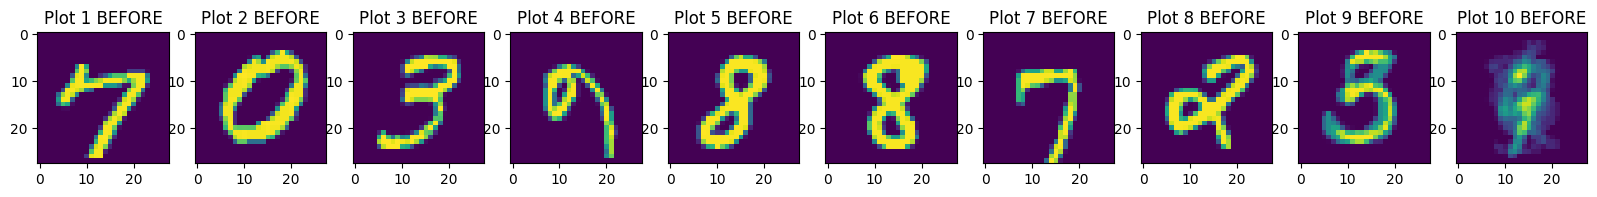

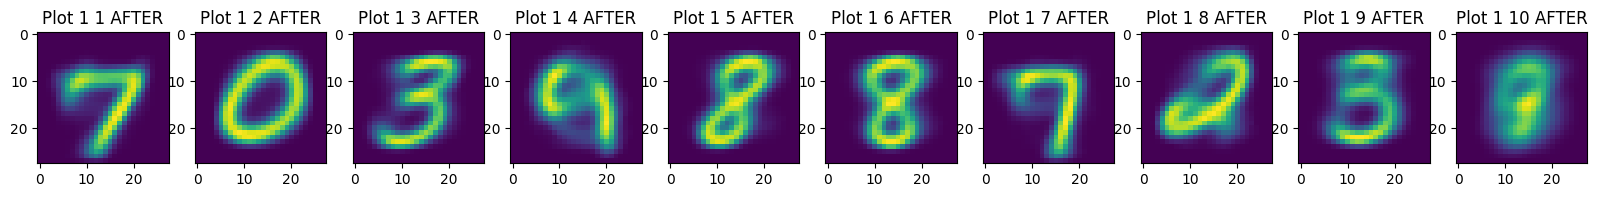

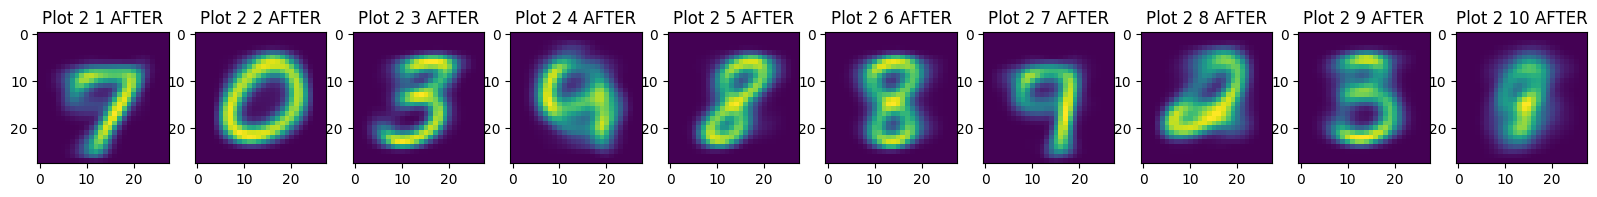

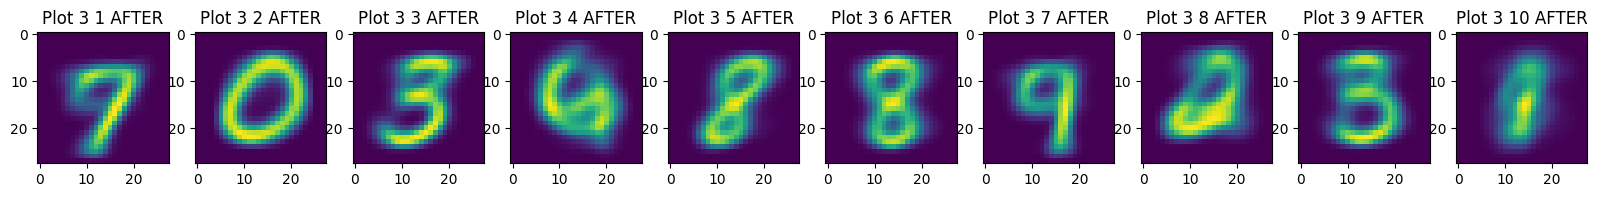

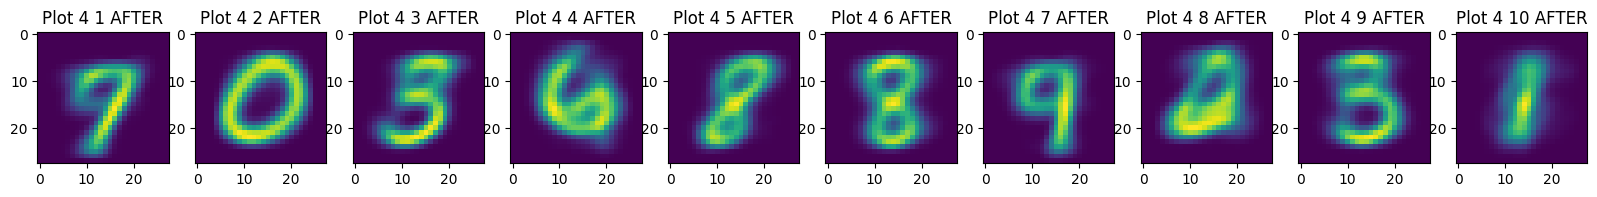

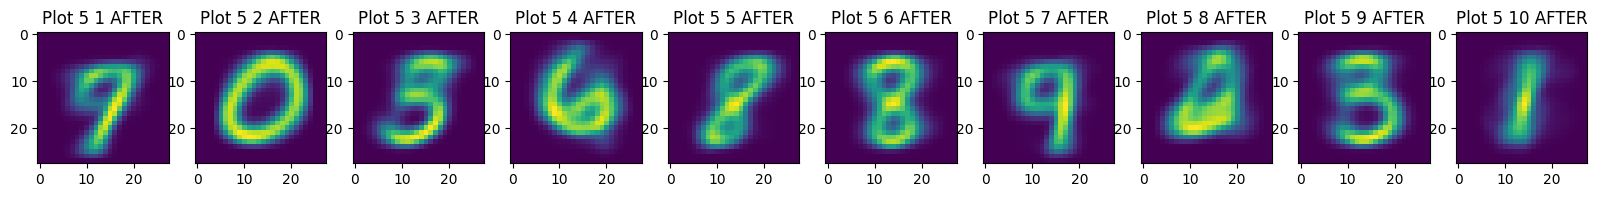

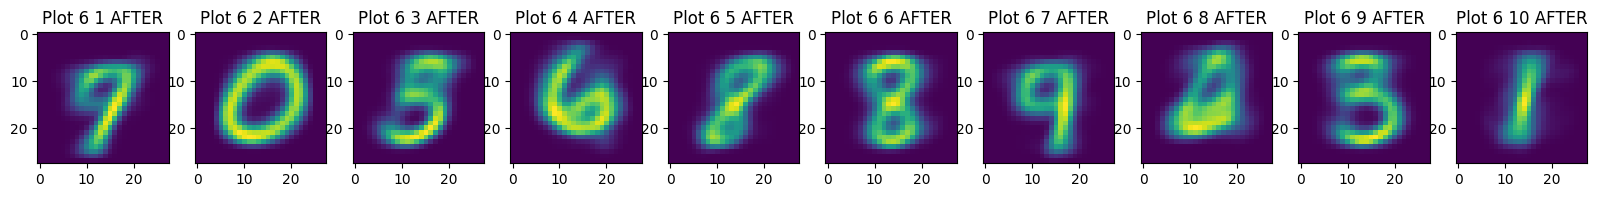

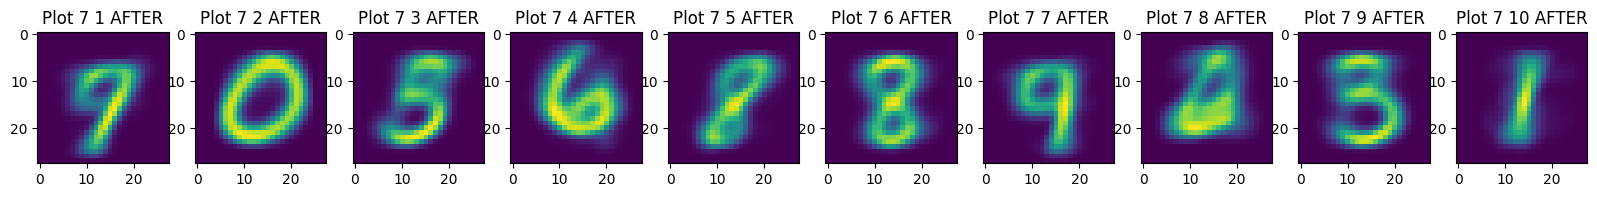

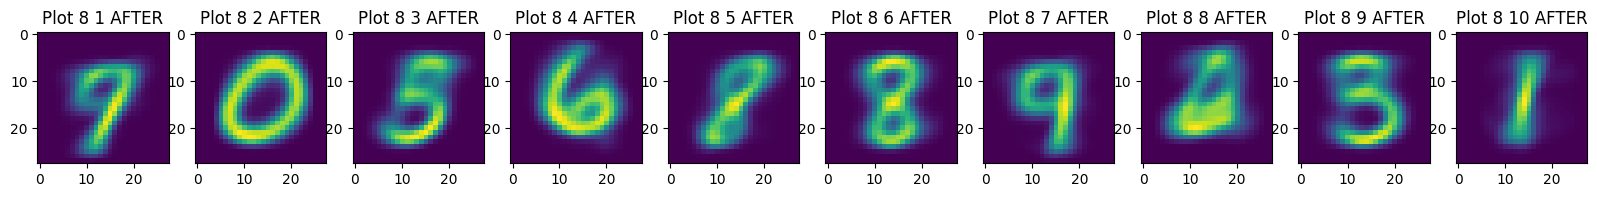

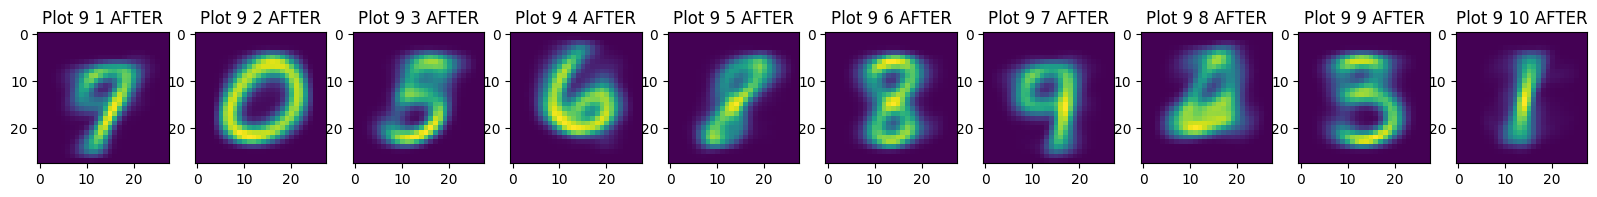

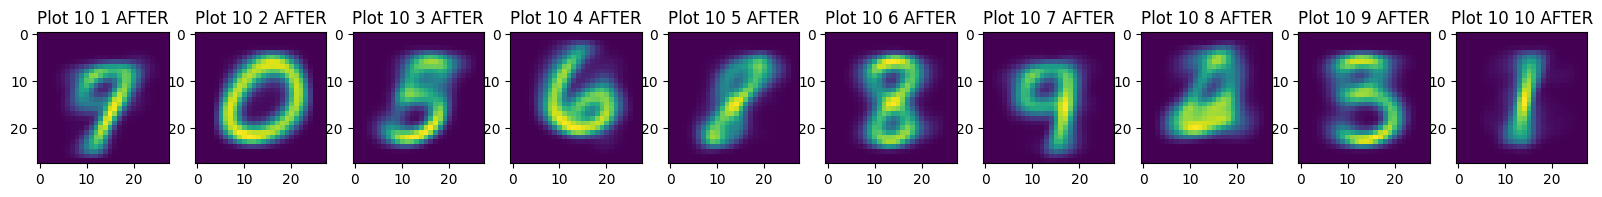

In [23]:
tol=0.05 # experiment with this

prev_error = float("inf")
curr_error = float("inf")

N = len(x_train)
counter = 0

fig, axs = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
  axs[i].imshow(centroids_2[i].reshape((28,28)))  # Replace with your data
  axs[i].set_title(f'Plot {i+1} BEFORE')  # Set a title for each plot

for i in range(10):
  counter +=1
  # print("COUNTER:", counter)
  for i in range(N):
    # Calculate the distance from the data point to each centroid
    dists = [l2_dist(x_train[i], centroid) for centroid in centroids_2]
    # Assign the data point to the cluster with the nearest centroid
    assignment = dists.index(min(dists))
    cluster_assignments_2[i] = assignment

  # update centroids
  for centroid_num in range(K):
    new_centroids = np.array([x_train[cluster_assignments_2 == i].mean(axis=0) for i in range(K)])

    # Check for convergence
    # if np.all(centroids == new_centroids): break
    centroids_2 = new_centroids

  # meanerror
  meanerror = 0
  for i in range(N):
    meanerror += l2_dist(x_train[i], centroids_2[cluster_assignments_2[i]])**2
  meanerror = meanerror / len(x_train)
  curr_error = meanerror

  if abs(curr_error - prev_error) <= tol: break
  print(counter, abs(curr_error - prev_error))
  prev_error = curr_error

  # print("PLOT", centroids[0])
  # plt.imshow(centroids[0].reshape((28,28)))

  fig, axs = plt.subplots(1, 10, figsize=(20, 2))
  for i in range(10):
    axs[i].imshow(centroids_2[i].reshape((28,28)))  # Replace with your data
    axs[i].set_title(f'Plot {counter} {i+1} AFTER')  # Set a title for each plot

# Show the plot
plt.show()

## MinMax Initialization
Pick a first point randomly, then subsequently pick subsequent points to be as far as possible from each of the previous points. (i.e. append point with maximal minimum distance to the set of chosen points)

In [24]:
K_3 = 10

cluster_assignments_3 = np.array([-1] * len(x_train))

indices_3 = [np.random.choice(x_train.shape[0])]
centroids_3 = [x_train[indices_3[-1]]]

while len(centroids_3) < K_3:
    # find dists for all points
    distances = np.array([min([l2_dist(x, centroid) for centroid in centroids_3]) for x in x_train])
    # pick max dist
    next_index = np.argmax(distances)
    centroids_3.append(x_train[next_index])
    indices_3.append(next_index)

centroids_3 = np.array(centroids_3)

centroids_3.shape

(10, 784)

1 inf
2 419372.0720369164
3 89643.72493412392
4 62048.45758125745
5 62976.60593204666
6 60036.56109492201
7 37537.93536824174
8 16607.464760775212
9 8975.556178018916
10 5520.640098469332


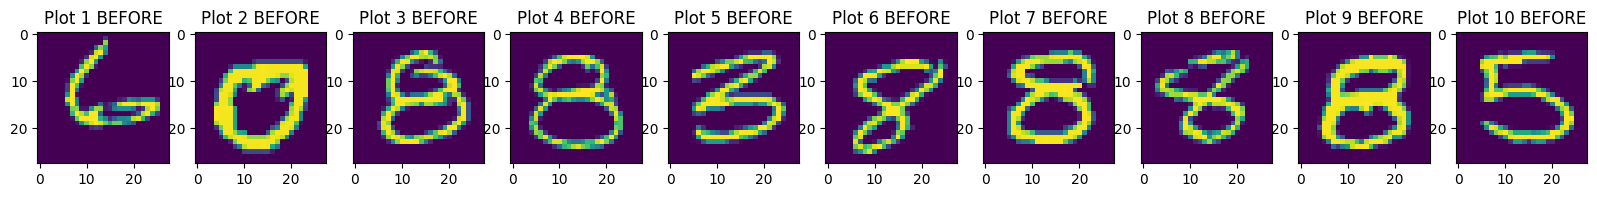

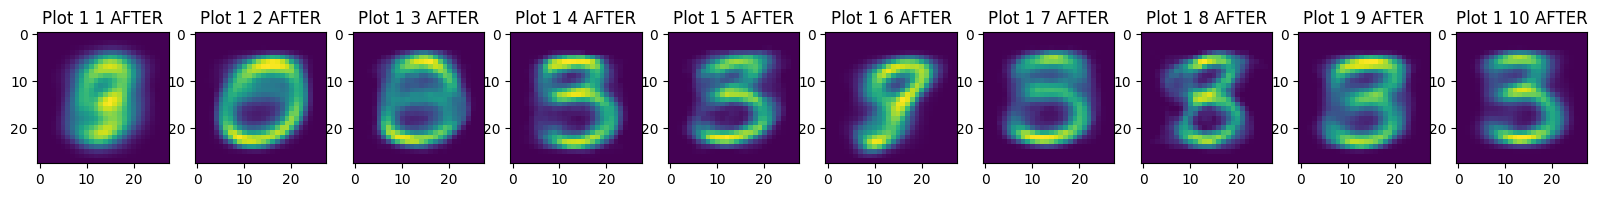

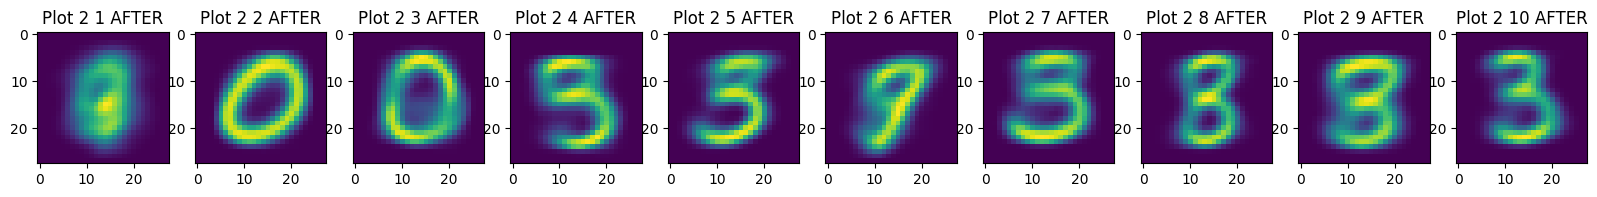

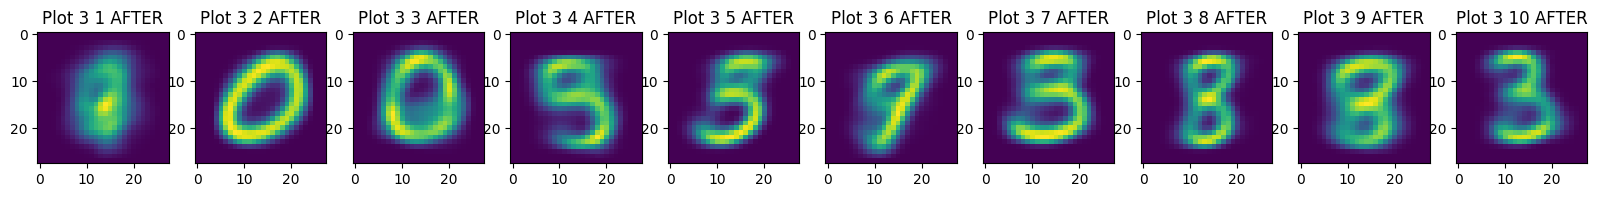

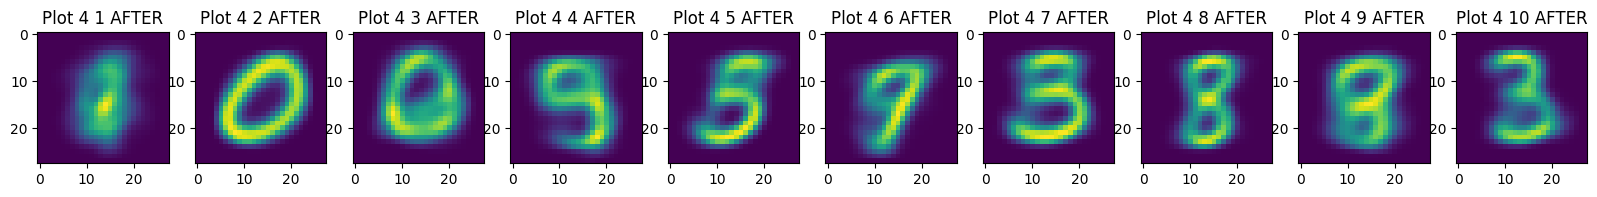

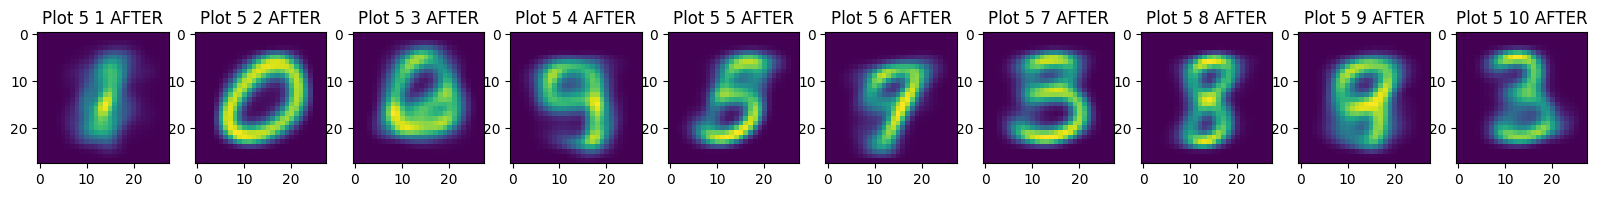

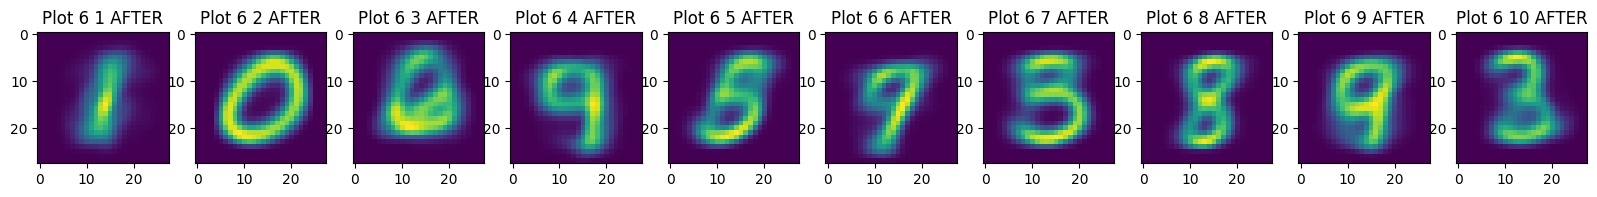

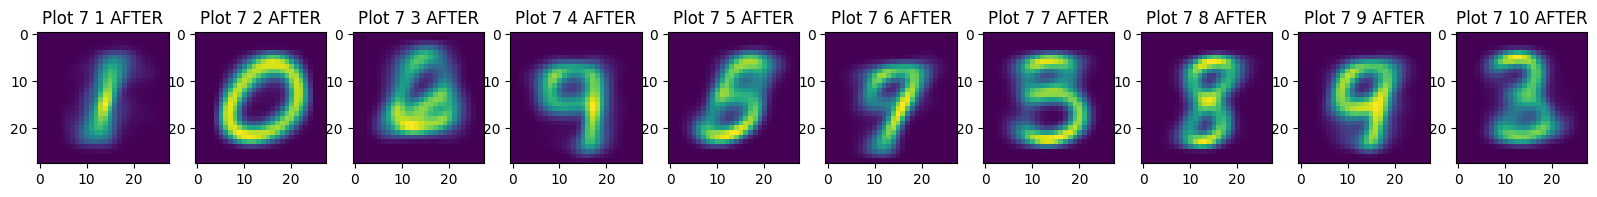

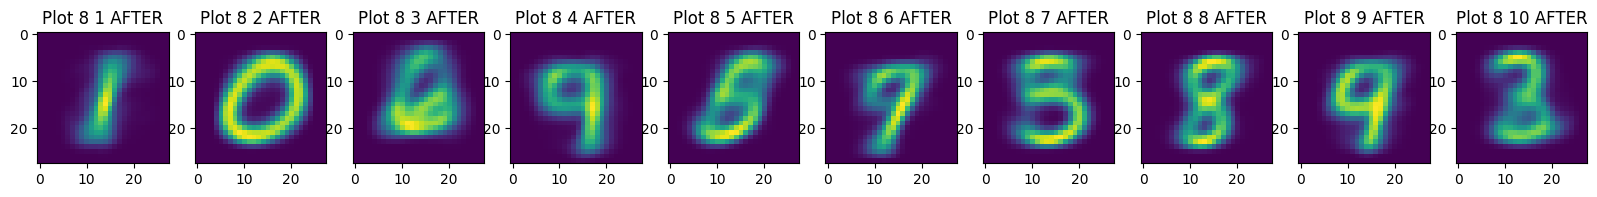

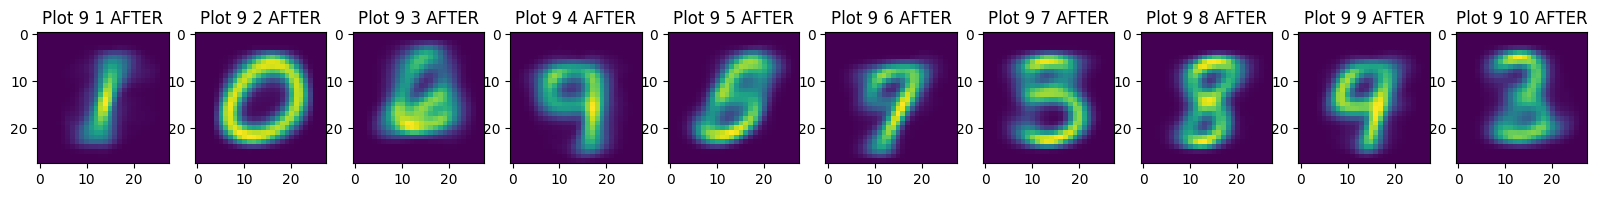

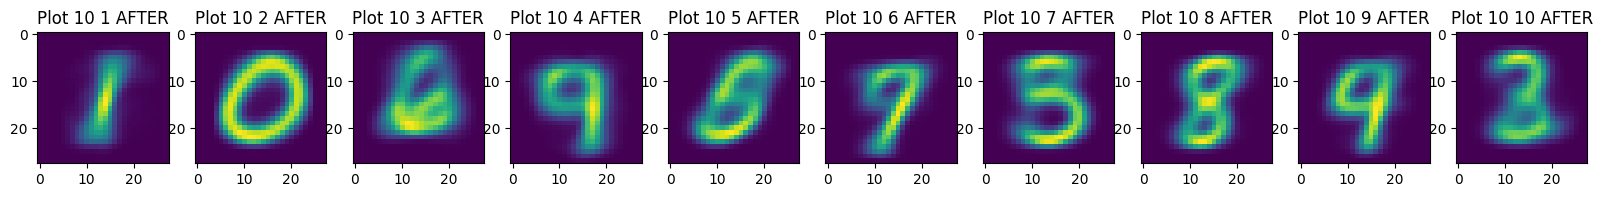

In [25]:
tol=0.05 # experiment with this

prev_error = float("inf")
curr_error = float("inf")

N = len(x_train)
counter = 0

fig, axs = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
  axs[i].imshow(centroids_3[i].reshape((28,28)))
  axs[i].set_title(f'Plot {i+1} BEFORE')  # Set a title for each plot

for i in range(10):
  counter +=1
  # print("COUNTER:", counter)
  for i in range(N):
    # Calculate the distance from the data point to each centroid
    dists = [l2_dist(x_train[i], centroid) for centroid in centroids_3]
    # Assign the data point to the cluster with the nearest centroid
    assignment = dists.index(min(dists))
    cluster_assignments_3[i] = assignment

  # update centroids
  for centroid_num in range(K_3):
    new_centroids = np.array([x_train[cluster_assignments_3 == i].mean(axis=0) for i in range(K_3)])

    # Check for convergence
    # if np.all(centroids == new_centroids): break
    centroids_3 = new_centroids

  # meanerror
  meanerror = 0
  for i in range(N):
    meanerror += l2_dist(x_train[i], centroids_3[cluster_assignments_3[i]])**2
  meanerror = meanerror / len(x_train)
  curr_error = meanerror

  if abs(curr_error - prev_error) <= tol: break
  print(counter, abs(curr_error - prev_error))
  prev_error = curr_error

  # print("PLOT", centroids[0])
  # plt.imshow(centroids[0].reshape((28,28)))

  fig, axs = plt.subplots(1, 10, figsize=(20, 2))
  for i in range(10):
    axs[i].imshow(centroids_3[i].reshape((28,28)))  # Replace with your data
    axs[i].set_title(f'Plot {counter} {i+1} AFTER')  # Set a title for each plot

# Show the plot
plt.show()

# Example implementation from HW